In [2]:
%matplotlib inline
import flopy
import matplotlib.pyplot as plt
import numpy as np
import pathlib as pl
import pandas as pd
from liss_settings import cx, cx_provider, extent, boxx, boxy, extentmax, fig_ext, transparent

/Users/jdhughes/miniforge3/envs/liss/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backends is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


In [25]:
mf_ws = pl.Path("../modflow/greenport500ft/run")
mf_dflow_ws = pl.Path("../modflow/greenport500ft/run_dflow")
mf_sfincs_ws = pl.Path("../modflow/greenport500ft/run_sfincs")

In [34]:
cobj = flopy.utils.CellBudgetFile(mf_ws / "green2010_v3.cbc")

In [35]:
times = cobj.get_times()
len(times)

90

In [36]:
cobj.get_unique_record_names()

[b'          STO-SS',
 b'          STO-SY',
 b'    FLOW-JA-FACE',
 b'      DATA-SPDIS',
 b'        DATA-SAT',
 b'             WEL',
 b'             DRN',
 b'             GHB',
 b'             RCH']

In [37]:
area = 500.0 * 500.0 * float(cobj.get_data(text="GHB", totim=times[0])[0].shape[0])
area

183750000.0

In [38]:
def get_ghb_flux(ws, area):
    obj = flopy.utils.CellBudgetFile(ws / "green2010_v3.cbc")
    arr = []
    for time in times:
        arr.append(-obj.get_data(text="GHB", totim=time)[0]["q"].sum() * 12.0 / area)
    return np.array(arr)

In [39]:
mf_ghb = get_ghb_flux(mf_ws, area)
mf_ghb

array([0.34901833, 0.28382869, 0.23308126, 0.19692   , 0.17338279,
       0.15588384, 0.14235952, 0.14618281, 0.12879892, 0.12029402,
       0.11316409, 0.1070271 , 0.10165159, 0.09687725, 0.09258889,
       0.08870165, 0.10139872, 0.23716984, 0.15099226, 0.13469974,
       0.12415991, 0.1158415 , 0.10901468, 0.10324065, 0.28160565,
       0.17500489, 0.15588546, 0.14326924, 0.13331182, 0.12514743,
       0.1182526 , 0.11229311, 0.10704755, 0.1148279 , 0.10352757,
       0.09882581, 0.09469699, 0.09098347, 0.08760049, 0.0844892 ,
       0.17981856, 0.17409749, 0.1350715 , 0.12449061, 0.11628461,
       0.10958374, 0.14616305, 0.11733814, 0.11016904, 0.10432601,
       0.09934025, 0.09498216, 0.09110272, 0.11390241, 0.3767144 ,
       0.40012947, 0.50289691, 0.34713911, 0.30654242, 0.27795383,
       0.25528218, 0.23682764, 0.22120039, 0.2078568 , 0.19621084,
       0.18592682, 0.17674047, 0.16845974, 0.1609388 , 0.15406441,
       0.14777783, 0.14294389, 0.13797579, 0.13267094, 0.12782

In [40]:
mf_dflow_ghb = get_ghb_flux(mf_dflow_ws, area)
mf_dflow_ghb

array([ 0.5140774 ,  0.51908314,  0.48218311,  0.36987067,  0.20580158,
        0.03823254, -0.08966687, -0.12253255, -0.09545315, -0.02171142,
        0.06261963,  0.1394423 ,  0.19434274,  0.22398219,  0.23688255,
        0.25422106,  0.28179157,  0.39680721,  0.25815009,  0.18264615,
        0.11522772,  0.04468155, -0.04393542, -0.12436576,  0.03300929,
       -0.0194277 ,  0.0598071 ,  0.1490107 ,  0.22525701,  0.28171383,
        0.33737924,  0.38115994,  0.3391315 ,  0.2262637 ,  0.06246006,
       -0.07218802, -0.14797651, -0.14250938, -0.08329635, -0.00769817,
        0.15796481,  0.21312891,  0.21876014,  0.23746093,  0.2499477 ,
        0.26833362,  0.31758076,  0.26590822,  0.21332897,  0.15544202,
        0.08655684, -0.00895355, -0.12113405, -0.16065247,  0.12368252,
        0.23112707,  0.43149784,  0.37144072,  0.41467083,  0.45217162,
        0.49487886,  0.48338151,  0.38296048,  0.22772546,  0.07647597,
       -0.03044218, -0.06508488, -0.03877358,  0.0119739 ,  0.06

In [41]:
mf_sfincs_ghb = get_ghb_flux(mf_sfincs_ws, area)
mf_sfincs_ghb

array([ 0.35068748,  0.39142828,  0.3899745 ,  0.32350296,  0.21586472,
        0.09786837, -0.00657617, -0.05968253, -0.09047177, -0.07416407,
       -0.03473942,  0.02428485,  0.08090708,  0.12631427,  0.15900291,
        0.18902399,  0.22866905,  0.34082043,  0.23963522,  0.19191613,
        0.14513244,  0.0965573 ,  0.03089505, -0.04458097,  0.0359666 ,
       -0.0783703 , -0.06803742, -0.0198786 ,  0.05564923,  0.14430976,
        0.23160168,  0.29892606,  0.29481256,  0.23655535,  0.12921705,
        0.02987821, -0.04933311, -0.08792221, -0.09461598, -0.07506316,
        0.03836025,  0.07820753,  0.09390633,  0.12885551,  0.15898405,
        0.19284558,  0.25144718,  0.23146568,  0.20813536,  0.17297623,
        0.1291899 ,  0.06436084, -0.024911  , -0.09437239,  0.04998539,
        0.05224296,  0.16443973,  0.11335833,  0.1991484 ,  0.28666914,
        0.36169361,  0.39100277,  0.34502863,  0.24837769,  0.14245163,
        0.04751365, -0.01382137, -0.04498475, -0.04623945, -0.03

In [47]:
data = np.empty(mf_ghb.shape, dtype=[("mf", float), ("mf_dflow", float), ("mf_sfincs", float), ("mf_cum", float), ("mf_dflow_cum", float), ("mf_sfincs_cum", float)])
data["mf"] = mf_ghb[:]
data["mf_dflow"] = mf_dflow_ghb[:]
data["mf_sfincs"] = mf_sfincs_ghb[:]
data["mf_cum"] = mf_ghb[:].cumsum()
data["mf_dflow_cum"] = mf_dflow_ghb[:].cumsum()
data["mf_sfincs_cum"] = mf_sfincs_ghb[:].cumsum()

In [52]:
df = pd.DataFrame(
    data=data,
    columns=data.dtype.names
)

In [53]:
df["datetime"] = pd.date_range('2010-01-02 00:00:00', periods=90, freq='D')

In [55]:
df = df.set_index('datetime')

In [84]:
df["zero"] = 0.0

In [85]:
df

,mf,mf_dflow,mf_sfincs,mf_cum,mf_dflow_cum,mf_sfincs_cum,zero
datetime,,,,,,,
2010-01-02,0.349018,0.514077,0.350687,0.349018,0.514077,0.350687,0.0
2010-01-03,0.283829,0.519083,0.391428,0.632847,1.033161,0.742116,0.0
2010-01-04,0.233081,0.482183,0.389975,0.865928,1.515344,1.132090,0.0
2010-01-05,0.196920,0.369871,0.323503,1.062848,1.885214,1.455593,0.0
2010-01-06,0.173383,0.205802,0.215865,1.236231,2.091016,1.671458,0.0
...,...,...,...,...,...,...,...
2010-03-28,0.090855,-0.023609,-0.186349,13.377772,12.959132,9.092330,0.0
2010-03-29,0.088344,0.081927,-0.108516,13.466117,13.041059,8.983815,0.0
2010-03-30,0.087246,0.178406,0.006136,13.553363,13.219465,8.989951,0.0


In [57]:
ws = pl.Path("figures")
ws.mkdir(exist_ok=True, parents=True)

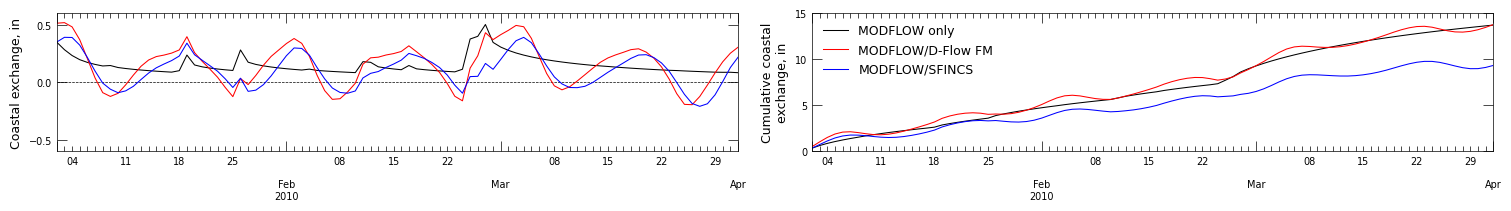

In [88]:
with flopy.plot.styles.USGSMap():
    fig, axs = plt.subplots(
        ncols=2,
        nrows=1,
        layout="constrained",
        figsize=(15, 2),
        )
    ax = axs[0]
    ax.set_ylim(-0.6,0.6)
    df["zero"].plot(ax=ax, lw=0.5, ls="--", color="black")
    df["mf"].plot(ax=ax, lw=0.75, color="black")
    df["mf_dflow"].plot(ax=ax, lw=0.75, color="red")
    df["mf_sfincs"].plot(ax=ax, lw=0.75, color="blue")
    ax.set_ylabel("Coastal exchange, in")
    ax.set_xlabel("")

    ax = axs[1]
    ax.set_ylim(0,15)
    df["mf_cum"].plot(ax=ax, lw=0.75, color="black")
    df["mf_dflow_cum"].plot(ax=ax, lw=0.75, color="red")
    df["mf_sfincs_cum"].plot(ax=ax, lw=0.75, color="blue")
    ax.set_ylabel("Cumulative coastal\nexchange, in")
    ax.set_xlabel("")
    leg = flopy.plot.styles.graph_legend(ax=ax, loc="lower right", title="none")
    handles, previous_labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=["MODFLOW only", "MODFLOW/D-Flow FM", "MODFLOW/SFINCS"])

    fig.savefig(ws / f"coastal_flux_summary{fig_ext}", dpi=300, transparent=transparent)
